<a href="https://colab.research.google.com/github/Gvitagliano/SSN/blob/main/SSN_1_GV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
from mpl_toolkits.mplot3d import Axes3D

In [43]:
# Defino las constantes que voy a usar (masa y carga del electrón y h barra)

e = 1.60217663*10**-19
m = 9.1093837*10**-31
h = 6.62607015*10**-34

# Defino las matrices de Pauli

s1 = np.array(([0,1],[1,0]))
s2 = np.array([[0,1j],[-1j,0]])
s3 = np.array(([1,0],[0,-1]))

sigma = np.array([s1,s2,s3]) # Vector de las matrices de Pauli

B = lambda Bx, By, Bz : np.array(([Bx],[By],[Bz])) # Vector del campo magnético externo

# Componentes del campo magnético

Bx = float(input('Ingresa el valor de la componente Bx:'))
By = float(input('Ingresa el valor de la componente By:'))
Bz = float(input('Ingresa el valor de la componente Bz:'))

# Hamiltoniano de un electrón bajo el efecto de un campo magnético

H = lambda Bx, By, Bz : (e*h/(2*m))*sum(B(Bx,By,Bz)[i] * sigma[i] for i in range(3))

# Eigenvectors y eigenvalues del electrón en ese hamiltoniano

spin,spinors = np.linalg.eig(H(Bx,By,Bz))
s = spinors[0]

print('Los vectores propios del hamiltoniano son:')
print(spinors)

n = np.array(([s@s1@s.T],[s@s2@s.T],[s@s3@s.T]))

print('Y la dirección del eje de precesión es:')
print(n)

#Cálculo de los ángulos del eje de precesión

norm_n = np.linalg.norm(n)
theta = np.arccos(n[2] / norm_n)
phi = np.arctan(n[1]/ n[0])

print('Con ángulos theta =',theta, 'y phi = ',phi)

Ingresa el valor de la componente Bx:1
Ingresa el valor de la componente By:0
Ingresa el valor de la componente Bz:3
Los vectores propios del hamiltoniano son:
[[ 0.98708746+0.j -0.16018224+0.j]
 [ 0.16018224-0.j  0.98708746+0.j]]
Y la dirección del eje de precesión es:
[[-0.31622777+0.j]
 [ 0.        +0.j]
 [ 0.9486833 +0.j]]
Con ángulos theta = [0.32175055-0.j] y phi =  [-0.-0.j]


Ingresa el valor del ángulo theta:0.32175055
Ingresa el valor del ángulo phi:0
El spin del electron precesa alrededor del eje:
[[0.31622776]
 [0.        ]
 [0.9486833 ]]


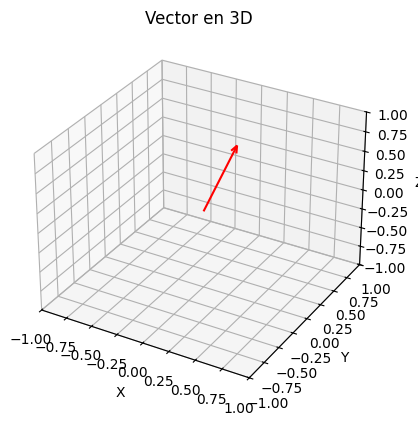

In [44]:
n = lambda th, ph : np.array(([np.sin(th)*np.cos(ph)],[np.sin(th)*np.sin(ph)],[np.cos(th)]))

theta = float(input('Ingresa el valor del ángulo theta:'))
phi = float(input('Ingresa el valor del ángulo phi:'))
print('El spin del electron precesa alrededor del eje:')
print(n(theta,phi))

# Ploteo el vector en la direccion en la que apuntan los vectores propios del electrón

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y, z = 0, 0, 0  # Origen
u, v, w = n(theta,phi)[0], n(theta,phi)[1], n(theta,phi)[2]  # Componente del vector direccion

ax.quiver(x, y, z, u, v, w, color='r', arrow_length_ratio=0.1)

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Vector en 3D')

plt.show() # (Podría haber ploteado la trayectoria circular del spin alrededor del eje pero no tengo tiempo)